## For this .ipynb, I follow Alan's GitHub. And I pick $M_{Z^\prime}=1500$ GeV as example.
https://github.com/alan200276/SVJ_Study/blob/master/Truth_Record_Plots.ipynb

## Import Packages

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import uproot
import pandas as pd
import sys, os
import importlib
import time
import datetime

%config InlineBackend.figure_format = 'retina'  # increase figure showing resolution

## Import .root File

In [2]:
filepath_3_5 = '/youwei_home/SVJ_py/Tutorial_v2/ROOT/rinv03/test0_2.root'  # 0_2 stands for zeroth generation and Z'=1500 GeV
file_3_5 = uproot.open(filepath_3_5)['Delphes;1']
file_3_5

<TTree b'Delphes' at 0x7f6d7d76f748>

## Print the Branch in the Delphes(Structure of .root)

In [3]:
file_3_5['Particle'].keys()

[b'Particle.fUniqueID',
 b'Particle.fBits',
 b'Particle.PID',
 b'Particle.Status',
 b'Particle.IsPU',
 b'Particle.M1',
 b'Particle.M2',
 b'Particle.D1',
 b'Particle.D2',
 b'Particle.Charge',
 b'Particle.Mass',
 b'Particle.E',
 b'Particle.Px',
 b'Particle.Py',
 b'Particle.Pz',
 b'Particle.P',
 b'Particle.PT',
 b'Particle.Eta',
 b'Particle.Phi',
 b'Particle.Rapidity',
 b'Particle.CtgTheta',
 b'Particle.D0',
 b'Particle.DZ',
 b'Particle.T',
 b'Particle.X',
 b'Particle.Y',
 b'Particle.Z']

In [4]:
file_3_5.show()

Event                      TStreamerInfo              asdtype('>i4')
Event.fUniqueID            TStreamerBasicType         asjagged(asdtype('>u4'))
Event.fBits                TStreamerBasicType         asjagged(asdtype('>u4'))
Event.Number               TStreamerBasicType         asjagged(asdtype('>i8'))
Event.ReadTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcessID            TStreamerBasicType         asjagged(asdtype('>i4'))
Event.MPI                  TStreamerBasicType         asjagged(asdtype('>i4'))
Event.Weight               TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSection         TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSectionError    TStreamerBasicType         asjagged(asdtype('>f4'))
Event.Scale                TStreamerBasicType         asjagged(asdtype('>f4'))
Event.AlphaQED             TStreamerBasicType         asjagged

#### Note: We have two ways to look into .root structure.

## Extract the Data of .root

In [5]:
file_3_5['Particle.PID'].array

<bound method TBranchMethods.array of <TBranchElement b'Particle.PID' at 0x7fc9e5009fd0>>

In [6]:
file_3_5['Particle.PID'].array()

<JaggedArray [[2212 2212 -2 ... -211 211 -211] [2212 2212 -2 ... 22 22 22] [2212 2212 2 ... 22 22 22] ... [2212 2212 -1 ... 22 22 22] [2212 2212 1 ... -211 211 -211] [2212 2212 1 ... 22 22 22]] at 0x7fc9e4e93278>

In [7]:
file_3_5.array('Particle.PID')

<JaggedArray [[2212 2212 -2 ... -211 211 -211] [2212 2212 -2 ... 22 22 22] [2212 2212 2 ... 22 22 22] ... [2212 2212 -1 ... 22 22 22] [2212 2212 1 ... -211 211 -211] [2212 2212 1 ... 22 22 22]] at 0x7fcb0802c470>

In [8]:
file_3_5.array('Particle.Eta')[0]

array([ 999.9      , -999.9      ,  999.9      , ...,   -2.3943224,
         -1.9157859,   -2.512671 ], dtype=float32)

In [9]:
print(file_3_5.array('Particle.Eta')[0])
print(len(file_3_5.array('Particle.Eta')[0]))

[ 999.9       -999.9        999.9       ...   -2.3943224   -1.9157859
   -2.512671 ]
1988


#### Note: We have two approachs to extract the data.

## Define the class to Fill Particle Informations into np.array

In [3]:
class BranchGenParticles:
    def __init__(self, data):
        self.data = data
        self.length = len(data.array('Particle.Status'))
        self.Status = data.array('Particle.Status')
        self.PID = data.array('Particle.PID')
        self.M1 = data.array('Particle.M1')
        self.M2 = data.array('Particle.M2')
        self.D1 = data.array('Particle.D1')
        self.D2 = data.array('Particle.D2')
        self.PT = data.array('Particle.PT')
        self.Eta = data.array('Particle.Eta')
        self.Phi = data.array('Particle.Phi')
        self.Mass = data.array('Particle.Mass')
        self.Labels = ['Status', 'PID', 'M1', 'M2', 'D1', 'D2', 'PT', 'Eta', 'Phi', 'Mass']
        
        
#     To get the GenParticles information array in the i-th event.
    def length_i(self, i):
        return len(self.Status[i])
    def Status_i(self, i):
        return self.Status[i]
    def PID_i(self, i):
        return self.PID[i]
    def M1_i(self, i):
        return self.M1[i]
    def M2_i(self, i):
        return self.M2[i]
    def D1_i(self, i):
        return self.D1[i]
    def D2_i(self, i):
        return self.D2[i]
    def PT_i(self, i):
        return self.PT[i]
    def Eta_i(self, i):
        return self.Eta[i]
    def Phi_i(self, i):
        return self.Phi[i]
    def Mass_i(self, i):
        return self.Mass[i]
    
    
    
class BranchJet:
    def __init__(self, data):
        self.data = data
        self.length = len(data.array('Jet.PT'))
        self.PT = data.array('Jet.PT')
        self.Eta = data.array('Jet.Eta')
        self.Phi = data.array('Jet.Phi')
        self.Mass = data.array('Jet.Mass')
        
    def length_i(self, i):
        return len(self.PT[i])
    def PT_i(self, i):
        return self.PT[i]
    def Eta_i(self, i):
        return self.Eta[i]
    def Phi_i(self, i):
        return self.Phi[i]
    def Mass_i(self, i):
        return self.Mass[i]
    
    
    
class Event_Weight:
    def __init__(self, data):
        self.data = data
        self.length = len(data.array('Event.Weight'))
        self.Event_Weight = np.array(data.array('Event.Weight'))
        
    def Event_Weight_i(self, i):
        return self.Event_Weight[i]

#### Note: Problems:
1. I want to invariant mass and transverse mass functions to be written in class.
2. Why np.array(data.array('Event.Weight'))

## Define Functions

### 1. Invariant Mass and Transverse Mass

In [4]:
def M(pt1, eta1, phi1, m1, pt2, eta2, phi2, m2):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    return np.sqrt((e1+e2)**2 - (px1+px2)**2 - (py1+py2)**2 - (pz1+pz2)**2)



def MT(pt1, eta1, phi1, m1, pt2, eta2, phi2, m2):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    ET1, ET2 = np.sqrt(m1**2 + pt1**2), np.sqrt(m2**2 + pt2**2)
    return np.sqrt((ET1+ET2)**2 - (px1+px2)**2 - (py1+py2)**2)

#### Note:
 \begin{align}
 \vec{p} = m\vec{v}=(p_x,p_y,p_z) = \left(\left|\vec{p}\right|,\theta,\phi\right)
 \end{align}
In Particle Physics, we construct a new parameter which called rapidity as
 \begin{align}
 y = \frac{1}{2}\log{\left(\frac{E+p_z}{E-p_z}\right)}
 \end{align}
Therefore, linear momentum is represented by
 \begin{align}
 \vec{p} = (p_T,y,\phi)
 \end{align}
The transformation relations, with the $z$-axis as the beam axis, are
 \begin{align}
 p_x &= p_T\cos{\phi} \\
 p_y &= p_T\sin{\phi} \\
 p_z &= m_T\sinh{y} \\
 E &= m_T\cosh{y}
 \end{align}
where transverse mass $m_T$ and transverse momentum $p_T$ are given by
 \begin{align}
 m_T^2 &= m^2+p_x^2+p_y^2 \\
 p_T &= p\sin{\theta}
 \end{align}
In detectors, we take $p\gg m$, the rapidity becomes pseudorapidity is used:
 \begin{align}
 \eta = -\ln\left(\tan{\frac{\theta}{2}}\right)
 \end{align}
with values between $(-\infty,\infty)$. Thus, linear momentum is
 \begin{align}
 \vec{p} = (p_T,\eta,\phi)
 \end{align}
And we have easier transformation relation
 \begin{align}
 p_z &\approx m_T\sinh{\eta} \approx p_T\sinh{\eta} = p\sin{\theta}\cot{\theta} \\
 \left|\vec{p}\right| &= p_T\cosh{\eta} = p\sin{\theta}\csc{\theta}
 \end{align}
In collider physics, we have another definition of transverse mass and transverse energy, in the case of a decay into two particles. The transverse mass is given by
 \begin{align}
 M_T^2 = \left(E_{T,1}+E_{T,2}\right)^2-\left(\vec{p}_{T,1}+\vec{p}_{T,2}\right)^2 = m_1^2+m_2^2+2\left(E_{T,1}E_{T,2}-\vec{p}_{T,1}\cdot\vec{p}_{T,2}\right)
 \end{align}
where $E_T$ which is the transverse energy of each daughter is
 \begin{align}
 E_T^2 = m^2+\left(\vec{p}_T\right)^2
 \end{align}

### 2. Finding Dark Quarks

In [5]:
def Find_xdxdbar(GP):
#     GP = GenParticles
    m_xdxdbar = []
    for i in range(GP.length):
        acc = 0
        for j in range(GP.length_i(i)):
            PID = GP.PID_i(i)[j]
            M1 = GP.M1_i(i)[j]
            M2 = GP.M2_i(i)[j]
            D1 = GP.D1_i(i)[j]
            D2 = GP.D2_i(i)[j]
            Status = GP.Status_i(i)[j]
            
            if PID == 5000001:
                if abs(GP.PID_i(i)[D1]) == abs(GP.PID_i(i)[D2]) == 4900101 and GP.Status_i(i)[D1] == GP.Status_i(i)[D2] == 23:
                    tmp_pt1 = GP.PT_i(i)[D1]
                    tmp_eta1 = GP.Eta_i(i)[D1]
                    tmp_phi1 = GP.Phi_i(i)[D1]
                    tmp_m1 = GP.Mass_i(i)[D1]
                    
                    tmp_pt2 = GP.PT_i(i)[D2]
                    tmp_eta2 = GP.Eta_i(i)[D2]
                    tmp_phi2 = GP.Phi_i(i)[D2]
                    tmp_m2 = GP.Mass_i(i)[D2]
                    break
            elif PID == 4900101 and Status == 23:
                tmp_pt1 = GP.PT_i(i)[j]
                tmp_eta1 = GP.Eta_i(i)[j]
                tmp_phi1 = GP.Phi_i(i)[j]
                tmp_m1 = GP.Mass_i(i)[j]
                acc += 1
                if acc == 2:
                    break
            elif PID == -4900101 and Status == 23:
                tmp_pt2 = GP.PT_i(i)[j]
                tmp_eta2 = GP.Eta_i(i)[j]
                tmp_phi2 = GP.Phi_i(i)[j]
                tmp_m2 = GP.Mass_i(i)[j]
                acc += 1
                if acc == 2:
                    break
                    
        m_xdxdbar.append(M(tmp_pt1, tmp_eta1, tmp_phi1, tmp_m1, tmp_pt2, tmp_eta2, tmp_phi2, tmp_m2))
            
    return np.array(m_xdxdbar)

In [6]:
def Find_xdxdbar_old(GP):
#     GP = GenParticles
    m_xdxdbar = []
    for i in range(GP.length):
        acc = 0
        for j in range(GP.length_i(i)):
            PID = GP.PID_i(i)[j]
            M1 = GP.M1_i(i)[j]
            M2 = GP.M2_i(i)[j]
            D1 = GP.D1_i(i)[j]
            D2 = GP.D2_i(i)[j]
            Status = GP.Status_i(i)[j]
            
            if PID == 5000001:
                if GP.PID_i(i)[D1] == 4900101 and GP.PID_i(i)[D2] == -4900101 and GP.Status_i(i)[D1] == GP.Status_i(i)[D2] == 23:
                    tmp_pt1 = GP.PT_i(i)[D1]
                    tmp_eta1 = GP.Eta_i(i)[D1]
                    tmp_phi1 = GP.Phi_i(i)[D1]
                    tmp_m1 = GP.Mass_i(i)[D1]
                    
                    tmp_pt2 = GP.PT_i(i)[D2]
                    tmp_eta2 = GP.Eta_i(i)[D2]
                    tmp_phi2 = GP.Phi_i(i)[D2]
                    tmp_m2 = GP.Mass_i(i)[D2]
                    break
                elif GP.PID_i(i)[D1] == -4900101 and GP.PID_i(i)[D2] == 4900101 and GP.Status_i(i)[D1] == GP.Status_i(i)[D2] == 23:
                    tmp_pt1 = GP.PT_i(i)[D1]
                    tmp_eta1 = GP.Eta_i(i)[D1]
                    tmp_phi1 = GP.Phi_i(i)[D1]
                    tmp_m1 = GP.Mass_i(i)[D1]
                    
                    tmp_pt2 = GP.PT_i(i)[D2]
                    tmp_eta2 = GP.Eta_i(i)[D2]
                    tmp_phi2 = GP.Phi_i(i)[D2]
                    tmp_m2 = GP.Mass_i(i)[D2]
                    break
            elif PID == 4900101 and Status == 23:
                tmp_pt1 = GP.PT_i(i)[j]
                tmp_eta1 = GP.Eta_i(i)[j]
                tmp_phi1 = GP.Phi_i(i)[j]
                tmp_m1 = GP.Mass_i(i)[j]
                acc += 1
                if acc == 2:
                    break
            elif PID == -4900101 and Status == 23:
                tmp_pt2 = GP.PT_i(i)[j]
                tmp_eta2 = GP.Eta_i(i)[j]
                tmp_phi2 = GP.Phi_i(i)[j]
                tmp_m2 = GP.Mass_i(i)[j]
                acc += 1
                if acc == 2:
                    break
                    
        m_xdxdbar.append(M(tmp_pt1, tmp_eta1, tmp_phi1, tmp_m1, tmp_pt2, tmp_eta2, tmp_phi2, tmp_m2))
            
    return np.array(m_xdxdbar)



# This is Alan's function. I would like to compare own with Alan efficiency of them.
def Find_xdxd_Alan(GenParticle):
    m_xdxd = []
    for i in range(GenParticle.length):
        for j in range(len(GenParticle.Status_i(i))):
            PID = GenParticle.PID_i(i)[j]
            M1 = GenParticle.M1_i(i)[j]
            M2 = GenParticle.M2_i(i)[j]
            D1 = GenParticle.D1_i(i)[j]
            D2 = GenParticle.D2_i(i)[j]
            status = GenParticle.Status_i(i)[j]
            
            if PID == 4900101:
                tmp_1_pt = GenParticle.PT_i(i)[j]
                tmp_1_eta = GenParticle.Eta_i(i)[j]
                tmp_1_phi = GenParticle.Phi_i(i)[j]
                tmp_1_m = GenParticle.Mass_i(i)[j]
#                 print(tmp_1_pt,tmp_1_eta,tmp_1_phi,tmp_1_m)
                break
                
        for j in range(len(GenParticle.Status_i(i))):
            PID = GenParticle.PID_i(i)[j]
            M1 = GenParticle.M1_i(i)[j]
            M2 = GenParticle.M2_i(i)[j]
            D1 = GenParticle.D1_i(i)[j]
            D2 = GenParticle.D2_i(i)[j]
            status = GenParticle.Status_i(i)[j]
            
            
            if PID == -4900101:
                tmp_2_pt = GenParticle.PT_i(i)[j]
                tmp_2_eta = GenParticle.Eta_i(i)[j]
                tmp_2_phi = GenParticle.Phi_i(i)[j]
                tmp_2_m = GenParticle.Mass_i(i)[j]
#                 print(tmp_2_pt,tmp_2_eta,tmp_2_phi,tmp_2_m)
                break
                
                
        m_xdxd.append(M(tmp_1_pt,tmp_1_eta,tmp_1_phi,tmp_1_m,tmp_2_pt,tmp_2_eta,tmp_2_phi,tmp_2_m))
        
    return np.array(m_xdxd)

### 3. Checking $r_\text{inv}$

In [77]:
def Check_rinv(GP):
#     GP = GenParticles
    invis_count, vis_count = 0, 0
    Nvmeson = 0
    for i in range(GP.length):
        for j in range(GP.length_i(i)):
            PID = GP.PID_i(i)[j]
            M1 = GP.M1_i(i)[j]
            M2 = GP.M2_i(i)[j]
            D1 = GP.D1_i(i)[j]
            D2 = GP.D2_i(i)[j]
            Status = GP.Status_i(i)[j]
            
            if abs(PID) == 4900111 and abs(GP.PID_i(i)[D1]) != 4900111 and abs(GP.PID_i(i)[D2]) != 4900111:
                if abs(GP.PID_i(i)[D1]) != 3 and abs(GP.PID_i(i)[D2]) != 3:
                    invis_count += 1
                elif abs(GP.PID_i(i)[D1]) == 3 or abs(GP.PID_i(i)[D2]) == 3:
                    vis_count += 1
                    
            elif abs(PID) == 4900113 and abs(GP.PID_i(i)[D1]) != 4900113 and abs(GP.PID_i(i)[D2]) != 4900113:
                if abs(GP.PID_i(i)[D1]) > 4900000 or abs(GP.PID_i(i)[D2]) > 4900000:  # and?
                    invis_count += 1
                elif abs(GP.PID_i(i)[D1]) < 6 or abs(GP.PID_i(i)[D2]) < 6:  # <=?; Ans: not decay to top quark
                    vis_count += 1
                    
            elif abs(PID) == 4900211 and Status == 1:
                Nvmeson += 1
                
            elif abs(PID) == 4900213 and Status == 1:
                Nvmeson += 1
                
    print('There are {} events.'.format(GP.length))
    print('There are {} Dark mesons decay into invisible particle.'.format(invis_count))
    print('There are {} Dark mesons decay into visible particle.'.format(vis_count))
    print('r_inv = {:^4.4f}'.format(invis_count/(invis_count+vis_count)))
    
    print('There are {} stable Dark mesons.'.format(Nvmeson))
    print('Average = {:^4.4f}'.format(Nvmeson/GP.length))
    
    return invis_count/(invis_count+vis_count), Nvmeson/GP.length



# This is Alan's function. I would like to compare own with Alan efficiency of them.
def Check_r_inv_Alan(GenParticle):
    invis_count, vis_count = 0, 0
    Ndark = 0
    for i in range(GenParticle.length):
        for j in range(len(GenParticle.Status_i(i))):
            PID = GenParticle.PID_i(i)[j]
            M1 = GenParticle.M1_i(i)[j]
            M2 = GenParticle.M2_i(i)[j]
            D1 = GenParticle.D1_i(i)[j]
            D2 = GenParticle.D2_i(i)[j]
            status = GenParticle.Status_i(i)[j]
            
            if (abs(PID) == 4900111) and (abs(GenParticle.PID_i(i)[D1]) != 4900111) and (abs(GenParticle.PID_i(i)[D2]) != 4900111):
                if (abs(GenParticle.PID_i(i)[D1]) != 3) and (abs(GenParticle.PID_i(i)[D2]) != 3):
                    invis_count += 1

            if (abs(PID) == 4900111) and (abs(GenParticle.PID_i(i)[D1]) != 4900111) and (abs(GenParticle.PID_i(i)[D2]) != 4900111):
                if (abs(GenParticle.PID_i(i)[D1]) == 3) or (abs(GenParticle.PID_i(i)[D2]) == 3):
                    vis_count += 1

            if (abs(PID) == 4900113) and (abs(GenParticle.PID_i(i)[D1]) != 4900113) and (abs(GenParticle.PID_i(i)[D2]) != 4900113):
                if (abs(GenParticle.PID_i(i)[D1]) > 490000) or (abs(GenParticle.PID_i(i)[D2]) > 490000):
                    invis_count += 1

            if (abs(PID) == 4900113) and (abs(GenParticle.PID_i(i)[D1]) != 4900113) and (abs(GenParticle.PID_i(i)[D2]) != 4900113):
                if (abs(GenParticle.PID_i(i)[D1]) < 6) or (abs(GenParticle.PID_i(i)[D2]) < 6):
                    vis_count += 1

            if (abs(PID) == 4900211) and (status == 1):
                    Ndark += 1

            if (abs(PID) == 4900213) and (status == 1):
                    Ndark += 1
    
    print("There are {} events.".format(len(GenParticle.Status)))
    print("There are Dark meson {}  decay into invisible particle.".format(invis_count))
    print("There are Dark meson {}  decay into visible particle.".format(vis_count))
    print("r_inv = {:^4.4f} ".format(invis_count/(invis_count+vis_count)))
    
    print("There are {} stable Dark mesons.".format(Ndark))
    print("Average = {:^4.4f} ".format(Ndark/len(GenParticle.Status)))
    
    return invis_count/(invis_count+vis_count), Ndark/len(GenParticle.Status)

### <font color=red> Problems: abs(D1)==3 or abs(D2)==3 Why is or? and this is not for this .cmnd setting. Thus, this function cannot work. </font>

#### Note:
Invisible rate is defined by
 \begin{align}
 r_\text{inv} \equiv \left\langle\frac{\#\ \text{of stable hadrons}}{\#\ \text{of hadrons}}\right\rangle
 \end{align}
If the dark hadrons decay entirely to visible states ($r_\text{inv}\to 0$). The opposite limit arises when none of the dark hadrons decay back to the SM (on collider timescales). In this limit, $r_\text{inv}\to 1$, and this scenario would be indistinguishable from WIMPs.  
But I think this definition is for whole system.  
In original setting, $4900211$ and $4900213$ both are stable, that are invisible.

In [59]:
def Check_rinv_bRatio(GP, darkhadron=4900111, dm=51):
    invis_count, vis_count = 0, 0
    for i in range(GP.length):
        for j in range(GP.length_i(i)):
            PID = GP.PID_i(i)[j]
            M1 = GP.M1_i(i)[j]
            M2 = GP.M2_i(i)[j]
            D1 = GP.D1_i(i)[j]
            D2 = GP.D2_i(i)[j]
            Status = GP.Status_i(i)[j]
            
            if abs(PID) == darkhadron and abs(GP.PID_i(i)[D1]) != darkhadron and abs(GP.PID_i(i)[D2]) != darkhadron:
                if abs(GP.PID_i(i)[D1]) < 6 and abs(GP.PID_i(i)[D2]) < 6:  # and becomes to or??
                    vis_count += 1
                elif abs(GP.PID_i(i)[D1]) == dm and abs(GP.PID_i(i)[D2]) == dm:
                    invis_count += 1
            
    print('There are {} events.'.format(GP.length))
    print('There are {} Dark Mesons decay into invisible particle.'.format(invis_count))
    print('There are {} Dark Mesons decay into visible particle.'.format(vis_count))
    print('r_inv = {:^6.4f}'.format(invis_count/(invis_count+vis_count)))
    
    return invis_count/(invis_count+vis_count), invis_count, vis_count

### 4. Preselection

In [ ]:
def Preselection(Jet):
    twojet_invariantmass = []
    survived_list = []
    for i in range(Jet.length):
        if Jet.length_i(i) < 2:
            continue
        elif Jet.PT_i(i)[0] < 440 or Jet.PT_i(i)[1] < 60:
            continue
        elif np.abs(Jet.Eta_i(i)[0]-Jet.Eta_i(i)[1]) > 1.2:
            continue
            
        twojet_invariantmass.append(M(Jet.PT_i(i)[0], Jet.Eta_i(i)[0], Jet.Phi_i(i)[0], Jet.Mass_i(i)[0],
                                      Jet.PT_i(i)[1], Jet.Eta_i(i)[1], Jet.Phi_i(i)[1], Jet.Mass_i(i)[1]))
        survived_list.append(i)
        
    print('There are {} events.'.format(len(twojet_invariantmass)))
    return np.array(twojet_invariantmass), np.array(survived_list)

### <font color=red> I don't understand! </font>

## Load Event via class

In [8]:
GP_3_5, Jet_3_5, EW_3_5 = BranchGenParticles(file_3_5), BranchJet(file_3_5), Event_Weight(file_3_5)

## Check the Number of Event

In [9]:
print('There are {} events in this file.'.format(GP_3_5.length))
print('There are {} events in this file.'.format(len(GP_3_5.Status)))  # Method of Alan

There are 14418 events in this file.
There are 14418 events in this file.


## Print the Truth Record in First and 66th Events

In [8]:
GP = GP_3_5
index = 0  # which event you want to print out

print('There are {} informations in this event.'.format(GP.length_i(index)))
print('{:^81}'.format('GenParticles Information'))
print('{:^5}{:^7}{:^8}{:^7}{:^7}{:^7}{:^7}{:^8}{:^8}{:^10}{:^8}'.format('#', 'Status', 'PID', 'M1', 'M2', 'D1', 'D2', 'PT', 'Eta', 'Phi', 'Mass'))
print('-'*81)

for j in range(GP.length_i(index)):
    print('{:^5}{:^7d}{:^8d}{:^7d}{:^7d}{:^7d}{:^7d}{:^8.3f}{:^8.3f}{:^10.3f}{:^8.3f}'.format(j, GP.Status_i(index)[j], GP.PID_i(index)[j], GP.M1_i(index)[j],
                                                                           GP.M2_i(index)[j], GP.D1_i(index)[j], GP.D2_i(index)[j],
                                                                           GP.PT_i(index)[j], GP.Eta_i(index)[j], GP.Phi_i(index)[j], GP.Mass_i(index)[j]))

There are 1988 informations in this event.
                            GenParticles Information                             
  #  Status   PID     M1     M2     D1     D2      PT     Eta      Phi      Mass  
---------------------------------------------------------------------------------
  0     4     2212    -1     -1     515    -1    0.000  999.900   0.000    0.938  
  1     4     2212    -1     -1     516    -1    0.000  -999.900  0.000    0.938  
  2    21      -2      5     -1      4     -1    0.000  999.900   0.000    0.000  
  3    21      2       6      6      4     -1    0.000  -999.900  0.000    0.000  
  4    22   5000001    2      3      7      7    0.000  -999.900  0.000   1464.868
  5    41      -2     13     13      8      2    0.000  999.900   1.571    0.000  
  6    42      2      14     -1      3      3    0.000  -999.900  0.000    0.000  
  7    44   5000001    4      4     15     15    31.346  -4.442   -2.543  1464.868
  8    43      21      5     -1     16     16 

#### Note: Event 66th has no 5000001 particle.

In [9]:
GP = GP_3_5
index = 66  # which event you want to print out

print('There are {} informations in this event.'.format(GP.length_i(index)))
print('{:^81}'.format('GenParticles Information'))
print('{:^5}{:^7}{:^8}{:^7}{:^7}{:^7}{:^7}{:^8}{:^8}{:^10}{:^8}'.format('#', 'Status', 'PID', 'M1', 'M2', 'D1', 'D2', 'PT', 'Eta', 'Phi', 'Mass'))
print('-'*81)

for j in range(GP.length_i(index)):
    print('{:^5}{:^7d}{:^8d}{:^7d}{:^7d}{:^7d}{:^7d}{:^8.3f}{:^8.3f}{:^10.3f}{:^8.3f}'.format(j, GP.Status_i(index)[j], GP.PID_i(index)[j], GP.M1_i(index)[j],
                                                                           GP.M2_i(index)[j], GP.D1_i(index)[j], GP.D2_i(index)[j],
                                                                           GP.PT_i(index)[j], GP.Eta_i(index)[j], GP.Phi_i(index)[j], GP.Mass_i(index)[j]))

There are 2486 informations in this event.
                            GenParticles Information                             
  #  Status   PID     M1     M2     D1     D2      PT     Eta      Phi      Mass  
---------------------------------------------------------------------------------
  0     4     2212    -1     -1     858    -1    0.000  999.900   0.000    0.938  
  1     4     2212    -1     -1     859    -1    0.000  -999.900  0.000    0.938  
  2    21      -1      9     -1      4      5    0.000  999.900   0.000    0.000  
  3    21      1      10     10      4      5    0.000  -999.900  0.000    0.000  
  4    23   4900101    2      3      6      7   280.483  -1.577   3.131    10.000 
  5    23   -4900101   2      3      8      8   280.483  -0.840   -0.010   10.000 
  6    51   4900101    4     -1     11     11   275.980  -1.502   -3.125   10.000 
  7    51   4900021    4     -1     13     13    8.882   -2.768   0.969    0.000  
  8    52   -4900101   5      5     12     12 

## Find the Xd(4900101) and Xd~(-4900101) in the Truth Record Table for Invariant Mass

#### Note: Efficiency of them

In [10]:
print(time.strftime('%m/%d/%Y %a, %H:%M:%S %Z', time.localtime()))
start = datetime.datetime.now()

m_xdxdbar = Find_xdxdbar(GP_3_5)

end = datetime.datetime.now()
print('Time =', end - start)

12/01/2020 Tue, 02:10:59 UTC
Time = 0:04:08.328297


In [11]:
print(time.strftime('%m/%d/%Y %a, %H:%M:%S %Z', time.localtime()))
start = datetime.datetime.now()

m_xdxdbar_old = Find_xdxdbar_old(GP_3_5)

end = datetime.datetime.now()
print('Time =', end - start)

12/01/2020 Tue, 02:16:16 UTC
Time = 0:04:09.219748


In [12]:
print(time.strftime('%m/%d/%Y %a, %H:%M:%S %Z', time.localtime()))
start = datetime.datetime.now()

m_dxdx = Find_xdxd_Alan(GP_3_5)

end = datetime.datetime.now()
print('Time =', end - start)

12/01/2020 Tue, 02:20:46 UTC
Time = 0:10:09.356151


#### Note: Check our results are the same.

In [13]:
diff = m_xdxdbar - m_dxdx
time = 0
print('{:^5}{:^10}'.format('#', 'Difference'))
print('-'*17)
for i, element in enumerate(diff):
    if element == 0:
        time += 0
    else:
        time += 1
        print('{:^5d}{:^10.3f}'.format(i, element))
print('-'*17)
print('We have {} different results.'.format(time))

  #  Difference
-----------------
-----------------
We have 0 different results.


In [14]:
diff = m_xdxdbar_old - m_dxdx
time = 0
print('{:^5}{:^10}'.format('#', 'Difference'))
print('-'*17)
for i, element in enumerate(diff):
    if element == 0:
        time += 0
    else:
        time += 1
        print('{:^5d}{:^10.3f}'.format(i, element))
print('-'*17)
print('We have {} different results.'.format(time))

  #  Difference
-----------------
-----------------
We have 0 different results.


## Calculate the Number of Event for Event Weight

#### Note: Luminosity $\mathcal{L} = 37\ \mathrm{fb}^{-1}$

In [15]:
EW_3_5

In [16]:
weight_3_5 = EW_3_5.Event_Weight/20000

In [17]:
weight_3_5

array([array([3.2211636e-05], dtype=float32),
       array([3.2211636e-05], dtype=float32),
       array([3.2211636e-05], dtype=float32), ...,
       array([3.2211636e-05], dtype=float32),
       array([3.2211636e-05], dtype=float32),
       array([3.2211636e-05], dtype=float32)], dtype=object)

In [18]:
EW_3_5.Event_Weight

array([array([0.6442327], dtype=float32),
       array([0.6442327], dtype=float32),
       array([0.6442327], dtype=float32), ...,
       array([0.6442327], dtype=float32),
       array([0.6442327], dtype=float32),
       array([0.6442327], dtype=float32)], dtype=object)

In [19]:
EW_3_5.length

14418

In [20]:
EW_3_5.Event_Weight_i(2)+1

array([1.6442327], dtype=float32)

In [21]:
print(np.sum(EW_3_5.Event_Weight))
print(np.sum(weight_3_5))

[9288.099]
[0.46447173]


#### Note:
 \begin{align}
 \left\langle \text{w}_i \right\rangle = \frac{\sigma}{N} \Rightarrow \left\langle \sum_i \text{w}_i \right\rangle = \sigma
 \end{align}

## Plot

### Example 1: Plot in differential number of event

#### <font color=red> Notice: $M_{Z^\prime}=1500$ GeV </font>

Total events = 14418


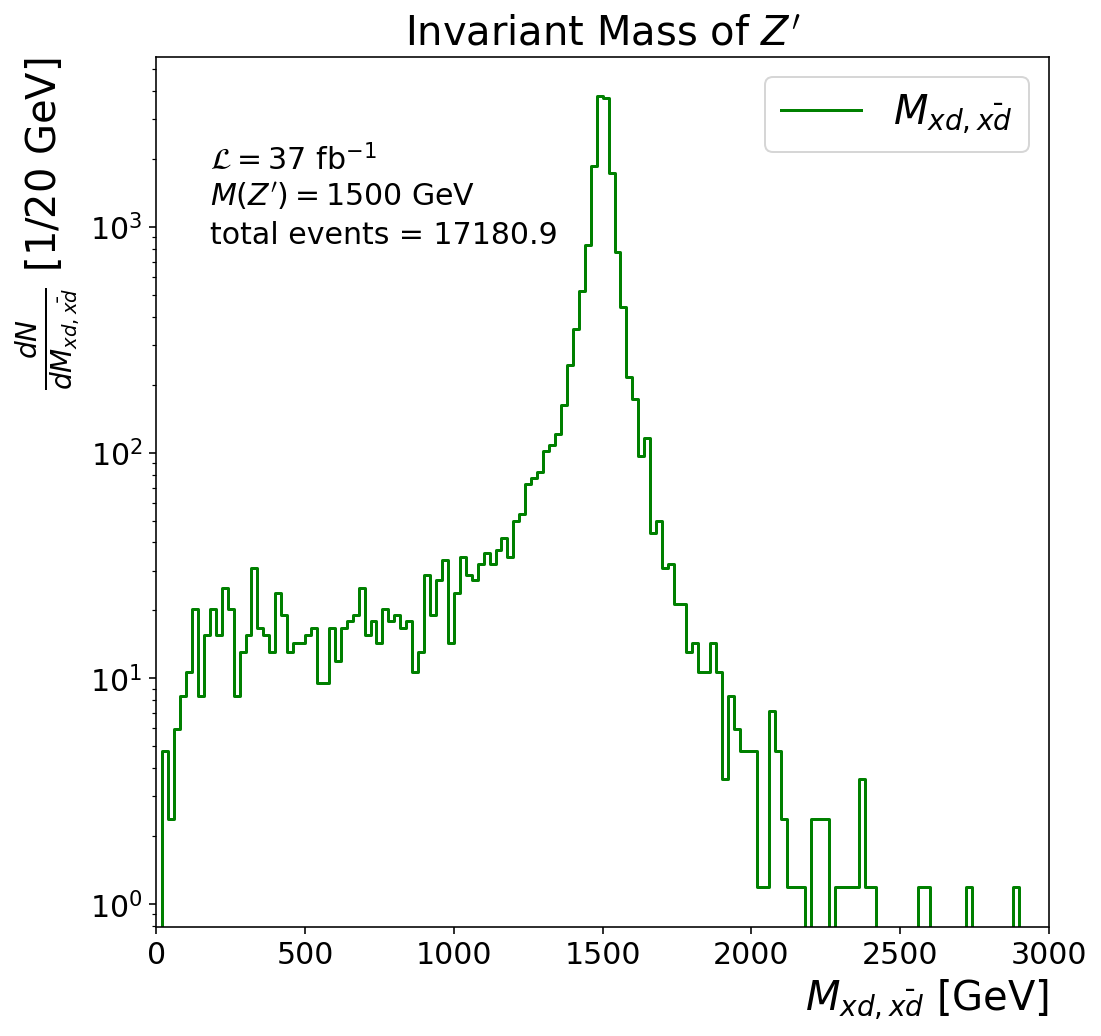

In [30]:
plt.figure(figsize=(8,8))  # plot size
print('Total events = {}'.format(len(m_xdxdbar)))

bin_size = np.linspace(0,5000,251)
hist, bins = np.histogram(m_xdxdbar, bins=bin_size, weights=weight_3_5*37*1000)

plt.step(bins[:-1], hist, where='post', color='green', label='$M_{xd,\\bar{xd}}$')
# plt.step(bins[:-1], hist.astype(np.float32), where='post', color='green', label='$M_{xd,\\bar{xd}}$')

plt.text(180, 1800, '$\mathcal{L} = 37\ \mathrm{fb}^{-1}$', fontsize=15)
plt.text(180, 1250, '$M(Z^\prime) = 1500$ GeV', fontsize=15)
plt.text(180, 850, 'total events = '+str(np.round(np.sum(hist.astype(np.float32)),2)), fontsize=15)

plt.legend(fontsize=20)
plt.yscale('log')
plt.title('Invariant Mass of $Z^\prime$', fontsize=20)
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dM_{xd,\\bar{xd}}}$ [1/20 GeV]', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,3000)
plt.show()

In [31]:
print(np.max(m_xdxdbar))
print(np.min(m_xdxdbar))

3356.332385246394
20.749280046817308


In [32]:
hist_test, bins_test = np.histogram(m_xdxdbar, bins=bin_size, weights=weight_3_5*37*1000)

In [33]:
np.sum(hist_test)

array([17180.895], dtype=float32)

### Example 2: Plot in normalized to one

Total events = 14418


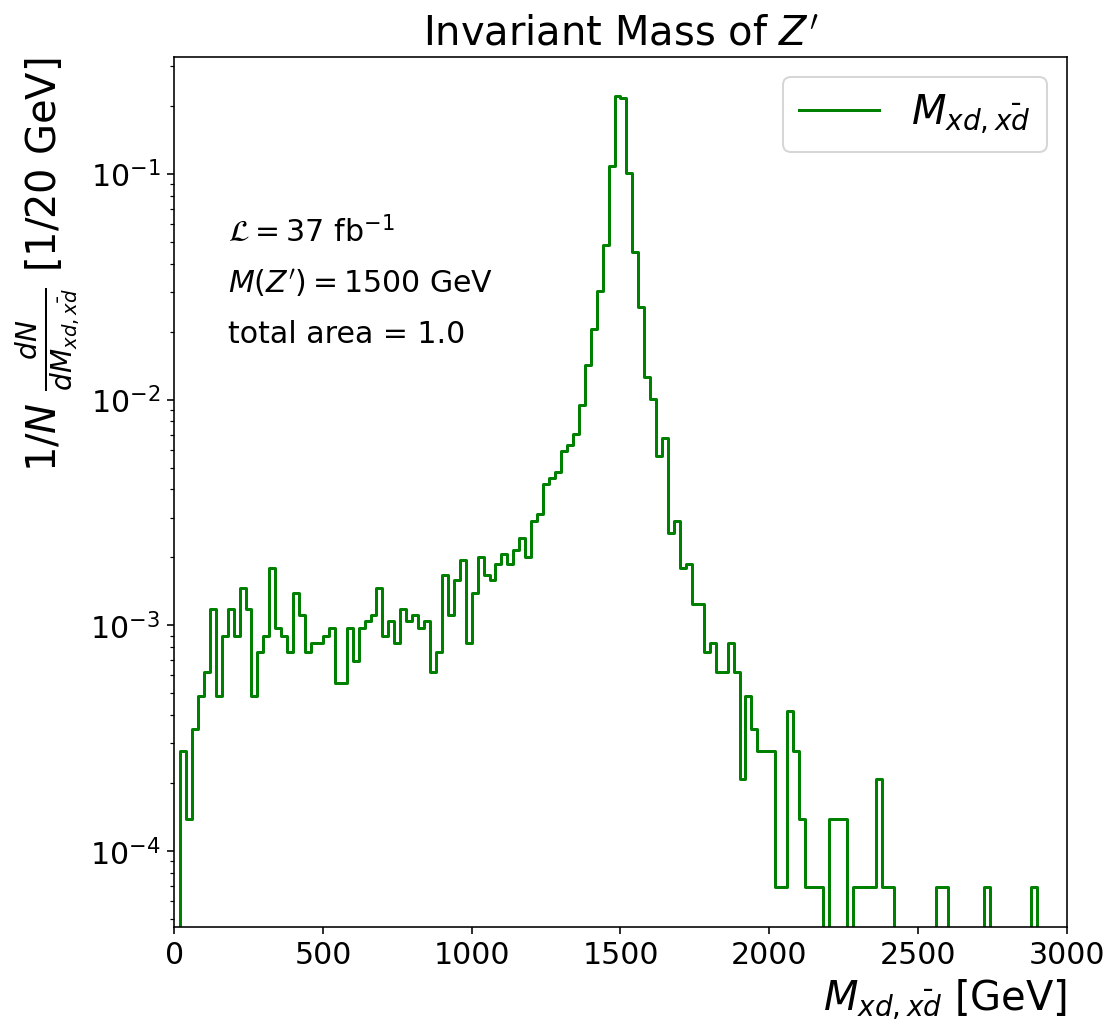

In [36]:
plt.figure(figsize=(8,8))  # plot size
print('Total events = {}'.format(len(m_xdxdbar)))

bin_size = np.linspace(0,5000,251)
hist, bins = np.histogram(m_xdxdbar, bins=bin_size, weights=weight_3_5)

plt.step(bins[:-1], hist/np.sum(hist), where='post', color='green', label='$M_{xd,\\bar{xd}}$')
# plt.step(bins[:-1], hist.astype(np.float32), where='post', color='green', label='$M_{xd,\\bar{xd}}$')

plt.text(180, 0.05, '$\mathcal{L} = 37\ \mathrm{fb}^{-1}$', fontsize=15)
plt.text(180, 0.03, '$M(Z^\prime) = 1500$ GeV', fontsize=15)
plt.text(180, 0.018, 'total area = '+str(np.round(np.sum(hist.astype(np.float32)/np.sum(hist)),2)), fontsize=15)

plt.legend(fontsize=20)
plt.yscale('log')
plt.title('Invariant Mass of $Z^\prime$', fontsize=20)
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$1/N\ \\frac{dN}{dM_{xd,\\bar{xd}}}$ [1/20 GeV]', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,3000)
# plt.ylim(0.001,0.1)
plt.show()

In [37]:
np.sum(hist)

array([0.46447173], dtype=float32)

### Example 3: Plot in differential cross section

Total events = 14418


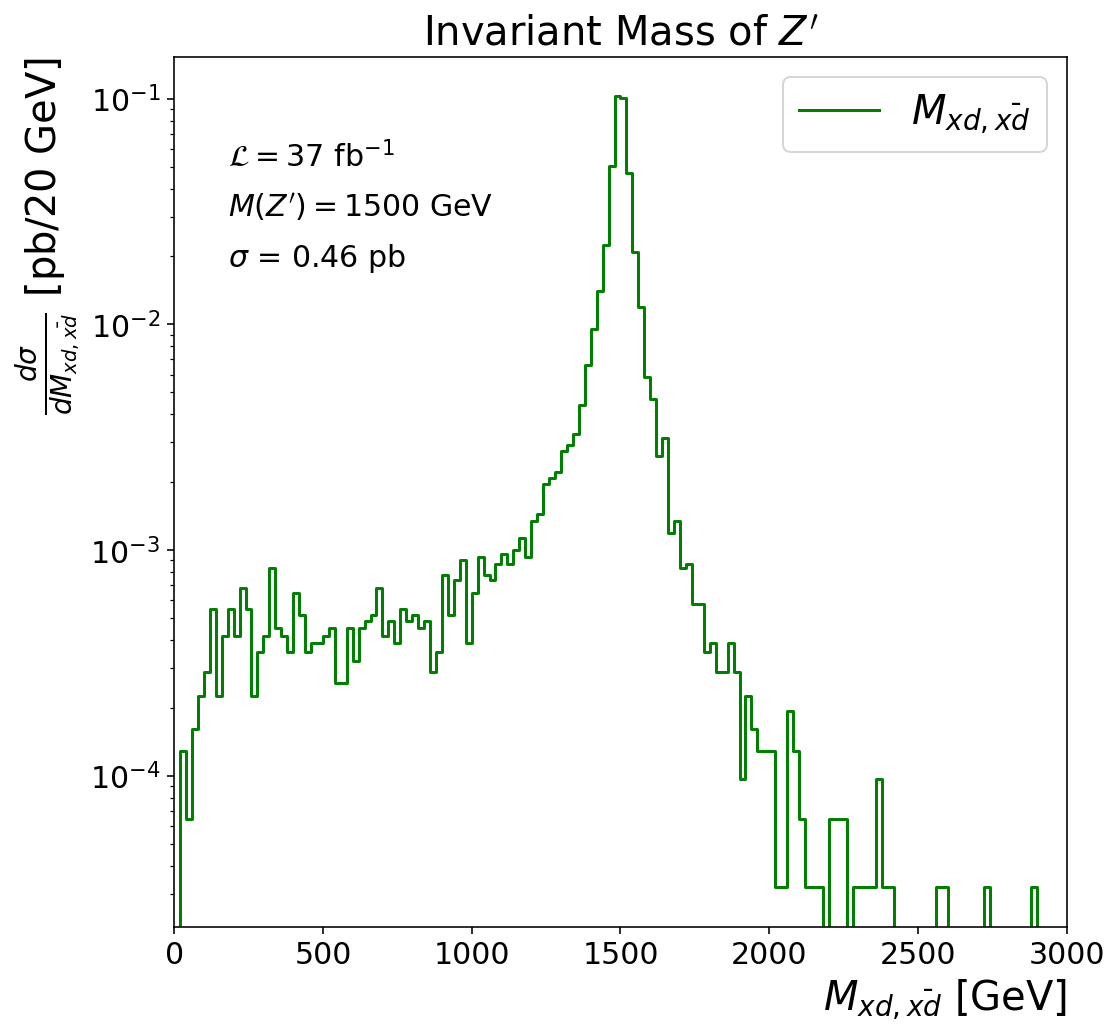

In [39]:
plt.figure(figsize=(8,8))  # plot size
print('Total events = {}'.format(len(m_xdxdbar)))

bin_size = np.linspace(0,5000,251)
hist, bins = np.histogram(m_xdxdbar, bins=bin_size, weights=weight_3_5)

plt.step(bins[:-1], hist, where='post', color='green', label='$M_{xd,\\bar{xd}}$')
# plt.step(bins[:-1], hist.astype(np.float32), where='post', color='green', label='$M_{xd,\\bar{xd}}$')

plt.text(180, 0.05, '$\mathcal{L} = 37\ \mathrm{fb}^{-1}$', fontsize=15)
plt.text(180, 0.03, '$M(Z^\prime) = 1500$ GeV', fontsize=15)
plt.text(180, 0.018, '$\sigma$ = '+str(np.round(np.sum(hist)[0],2))+' pb', fontsize=15)

plt.legend(fontsize=20)
plt.yscale('log')
plt.title('Invariant Mass of $Z^\prime$', fontsize=20)
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{d\sigma}{dM_{xd,\\bar{xd}}}$ [pb/20 GeV]', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,3000)
plt.show()

In [40]:
np.sum(hist)[0]

0.46447173

## Check the $r_\text{inv}$

In [41]:
Lambda_d = [1, 5, 10, 50, 100, 150, 200, 250, 300, 350]
b = (11/3)*2-(2/3)*2
for L in Lambda_d:
    print('Lambda_d = {:^5.1f}  alpha = {:^6.3f}'.format(L, 2*np.pi/(b*np.log(1000/L))))

Lambda_d =  1.0   alpha = 0.152 
Lambda_d =  5.0   alpha = 0.198 
Lambda_d = 10.0   alpha = 0.227 
Lambda_d = 50.0   alpha = 0.350 
Lambda_d = 100.0  alpha = 0.455 
Lambda_d = 150.0  alpha = 0.552 
Lambda_d = 200.0  alpha = 0.651 
Lambda_d = 250.0  alpha = 0.755 
Lambda_d = 300.0  alpha = 0.870 
Lambda_d = 350.0  alpha = 0.997 


In [ ]:
import time
import datetime

In [57]:
# print(time.strftime('%m/%d/%Y %a, %H:%M:%S %Z', time.localtime()))
start = datetime.datetime.now()

rinv_4900111, invis_4900111, vis_4900111 = Check_rinv_bRatio(GP_3_5)
print('-'*58)

end = datetime.datetime.now()
print('Time =', end - start)

There are 14418 events.
There are 6565 Dark Mesons decay into invisible particle.
There are 15494 Dark Mesons decay into visible particle.
r_inv = 0.2976
----------------------------------------------------------
Time = 0:17:24.717621


In [58]:
print(rinv_4900111, invis_4900111, vis_4900111)

0.2976109524457138 6565 15494


In [60]:
# print(time.strftime('%m/%d/%Y %a, %H:%M:%S %Z', time.localtime()))
start = datetime.datetime.now()

rinv_4900113, invis_4900113, vis_4900113 = Check_rinv_bRatio(GP_3_5, darkhadron=4900113, dm=53)
print('-'*58)

end = datetime.datetime.now()
print('Time =', end - start)

There are 14418 events.
There are 19723 Dark Mesons decay into invisible particle.
There are 46009 Dark Mesons decay into visible particle.
r_inv = 0.3001
----------------------------------------------------------
Time = 0:17:22.281651


In [61]:
print(rinv_4900113, invis_4900113, vis_4900113)

0.3000517251871235 19723 46009


In [62]:
# print(time.strftime('%m/%d/%Y %a, %H:%M:%S %Z', time.localtime()))
start = datetime.datetime.now()

rinv_4900211, invis_4900211, vis_4900211 = Check_rinv_bRatio(GP_3_5, darkhadron=4900211, dm=51)
print('-'*58)

end = datetime.datetime.now()
print('Time =', end - start)

There are 14418 events.
There are 6595 Dark Mesons decay into invisible particle.
There are 15545 Dark Mesons decay into visible particle.
r_inv = 0.2979
----------------------------------------------------------
Time = 0:17:19.431047


In [63]:
print(rinv_4900211, invis_4900211, vis_4900211)

0.29787714543812105 6595 15545


In [64]:
# print(time.strftime('%m/%d/%Y %a, %H:%M:%S %Z', time.localtime()))
start = datetime.datetime.now()

rinv_4900213, invis_4900213, vis_4900213 = Check_rinv_bRatio(GP_3_5, darkhadron=4900213, dm=53)
print('-'*58)

end = datetime.datetime.now()
print('Time =', end - start)

There are 14418 events.
There are 19542 Dark Mesons decay into invisible particle.
There are 45612 Dark Mesons decay into visible particle.
r_inv = 0.2999
----------------------------------------------------------
Time = 0:17:21.670122


In [65]:
print(rinv_4900213, invis_4900213, vis_4900213)

0.2999355373422967 19542 45612


#### Note: Total invisible rate

In [66]:
num_invis = invis_4900111+invis_4900113+invis_4900211+invis_4900213
num_vis = vis_4900111+vis_4900113+vis_4900211+vis_4900213
num_invis/(num_invis+num_vis)

0.29942599308907103

#### Note: Old functions cannot work.

In [76]:
Check_rinv(GP_3_5)

There are 14418 events.
There are 6565 Dark mesons decay into invisible particle.
There are 61503 Dark mesons decay into visible particle.
r_inv = 0.0964
There are 0 stable Dark mesons.
Average = 0.0000


(0.09644766997708175, 0.0)

In [82]:
# print(time.strftime('%m/%d/%Y %a, %H:%M:%S %Z', time.localtime()))
start = datetime.datetime.now()

print(Check_r_inv_Alan(GP_3_5))

end = datetime.datetime.now()
print('Time =', end - start)

There are 14418 events.
There are Dark meson 6565  decay into invisible particle.
There are Dark meson 61503  decay into visible particle.
r_inv = 0.0964 
There are 0 stable Dark mesons.
Average = 0.0000 
(0.09644766997708175, 0.0)
Time = 0:21:00.864666


In [ ]:
def Check_rinv_bRatio(GP, darkhadron=4900101, dm=51):
    invis_count, vis_count = 0, 0
    N_darkhadron = 0
    for i in range(GP.length):
        for j in range(GP.length_i(i)):
            PID = GP.PID_i(i)[j]
            M1 = GP.M1_i(i)[j]
            M2 = GP.M2_i(i)[j]
            D1 = GP.D1_i(i)[j]
            D2 = GP.D2_i(i)[j]
            Status = GP.Status_i(i)[j]
            
            if abs(PID) == darkhadron and abs(GP.PID_i(i)[D1]) != darkhadron and abs(GP.PID_i(i)[D2]) != darkhadron:
                if abs(GP.PID_i(i)[D1]) < 6 and abs(GP.PID_i(i)[D2]) < 6:  # and becomes to or??
                    vis_count += 1
                elif abs(GP.PID_i(i)[D1]) == dm and abs(GP.PID_i(i)[D2]) == dm:
                    invis_count += 1
                    
            elif abs(PID) == 4900211 and Status == 1:
                N_darkhadron += 1
                
            elif abs(PID) == 4900213 and Status == 1:
                N_darkhadron += 1
            
    print('There are {} events.'.format(GP.length))
    print('There are {} Dark Mesons decay into invisible particle.'.format(invis_count))
    print('There are {} Dark Mesons decay into visible particle.'.format(vis_count))
    print('r_inv = {:^4.4f}'.format(invis_count/(invis_count+vis_count)))